In [4]:
import grid2op
from grid2op.Agent import DeltaRedispatchRandomAgent, TopologyGreedy
import time
import tensorflow as tf

In [5]:
DATA_PATH = '/Users/yuzhao/miniforge3/envs/env_rl/lib/python3.8/site-packages/grid2op/data/l2rpn_case14_sandbox'
SCENARIO_PATH = '/Users/yuzhao/miniforge3/envs/env_rl/lib/python3.8/site-packages/grid2op/data/l2rpn_case14_sandbox/chronics'
env = grid2op.make(dataset=DATA_PATH, chronics_path=SCENARIO_PATH)

In [ ]:
TG_agent = TopologyGreedy(env.action_space) 
TGsteps = []
TGtt_reward = []
TGav_reward = []
old_t = time.time()
for i in range(30):
    print(i)
    done = False  #先把done置0
    time_step = int(0)  #计数
    cum_reward = 0.
    obs = env.reset()  #复位env
    reward = env.reward_range[0]
    max_iter = 8064  #设置最大迭代次数
    while not done:
        act = TG_agent.act(obs, reward, done) # chose an action to do, in this case "do nothing"
        obs, reward, done, info = env.step(act) # implement this action on the powergrid
        cum_reward += reward
        time_step += 1
        if time_step >= max_iter:
            break
    TGsteps.append(time_step)
    TGtt_reward.append(cum_reward)
    TGav_reward.append(cum_reward/time_step)
    print(time_step)
drdt = time.time()-old_t

0


## do nothing

## DeltaRedispatchRandomAgent

In [3]:
DRD_agent = DeltaRedispatchRandomAgent(env.action_space) 
DRDsteps = []
DRDtt_reward = []
DRDav_reward = []
old_t = time.time()
for i in range(30):
    print(i)
    done = False  #先把done置0
    time_step = int(0)  #计数
    cum_reward = 0.
    obs = env.reset()  #复位env
    reward = env.reward_range[0]
    max_iter = 8064  #设置最大迭代次数
    while not done:
        act = DRD_agent.act(obs, reward, done) # chose an action to do, in this case "do nothing"
        obs, reward, done, info = env.step(act) # implement this action on the powergrid
        cum_reward += reward
        time_step += 1
        if time_step >= max_iter:
            break
    DRDsteps.append(time_step)
    DRDtt_reward.append(cum_reward)
    DRDav_reward.append(cum_reward/time_step)
drdt = time.time()-old_t

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [6]:
DRDsteps = [809, 3001, 3, 804, 514, 1272, 1263, 511, 2822, 516, 2710, 965, 1093, 1090, 802, 1378, 4545,
 4551, 517, 519, 1095, 4841, 794, 1093, 1086, 3020, 2820, 2822, 377, 1087]

In [7]:
DRDtt_reward = [949.8231830000877, 3294.927020728588, -10.092550277709961, 960.7584004402161, 619.3648033738136,
 1439.6897917985916, 1421.3077521920204, 583.5471630692482, 3296.393582224846, 616.3874284029007,
 3064.5449243187904, 1046.2555090785027, 1287.7520629167557, 1273.5026908516884, 967.1718386411667, 1514.0909772515297,
 5089.322682917118, 5252.8620039224625, 572.3594712018967, 622.8781539201736, 1271.3551320433617,
 5580.098463535309, 936.4147850871086, 1169.2935991287231, 1212.1727929711342, 3335.6861560940742,
 3125.4888138771057, 3326.0050497055054, 414.1287257671356, 1238.0681780576706]

In [8]:
DRDav_reward = [1.174070683560059, 1.0979430259008958, -3.3641834259033203, 1.1949731348758905, 1.2049898898323221,
 1.1318315973259367, 1.1253426383151388, 1.1419709649104661, 1.168105450823829, 1.1945492798505828,
 1.1308283853574872, 1.0842026000813498, 1.1781812103538478, 1.1683510925244847, 1.2059499234927264,
 1.0987597802986426, 1.11976296653842, 1.1542214906443555, 1.1070782808547324, 1.2001505855880032,
 1.1610549151080929, 1.1526747497490826, 1.1793637091777187, 1.0698020120116405, 1.116181208997361,
 1.1045318397662498, 1.1083293666230871, 1.178598529307408, 1.0984846837324553, 1.138977164726468]

In [7]:
drdt

876.1864078044891

In [8]:
drdt/sum(DRDsteps)

0.017984121670863898

## Tutor

In [36]:
steps = []
tt_reward = []
av_reward = []
old_t = time.time()
for i in range(30):
    print(i)
    done = False  #先把done置0
    time_step = int(0)  #计数
    cum_reward = 0.
    obs = env.reset()  #复位env
    reward = env.reward_range[0]
    max_iter = 8064  #设置最大迭代次数
    while not done:
        act, idx = tutor.act(env, obs) # chose an action to do, in this case "do nothing"
        obs, reward, done, info = env.step(act) # implement this action on the powergrid
        cum_reward += reward
        time_step += 1
        if time_step >= max_iter:
            break
    steps.append(time_step)
    tt_reward.append(cum_reward)
    av_reward.append(cum_reward/time_step)
ttt = time.time()-old_t

0
2019-01-16 18:30:00: overload! line-17 has a max. rho of 1.00
    Action 14 decreases max. rho to 0.93, search duration is 3.89s
2019-01-16 19:30:00: overload! line-17 has a max. rho of 1.01
    Action 5 decreases max. rho to 0.87, search duration is 3.94s
1
2019-01-09 19:10:00: overload! line-17 has a max. rho of 1.00
    Action 14 decreases max. rho to 0.93, search duration is 3.55s
2
2019-01-09 19:20:00: overload! line-9 has a max. rho of 1.00
    Action 17 decreases max. rho to 0.88, search duration is 3.93s
2019-01-13 12:25:00: overload! line-10 has a max. rho of 1.01
    Action 11 decreases max. rho to 0.66, search duration is 2.97s
2019-01-14 12:00:00: overload! line-10 has a max. rho of 1.03
    Action 33 decreases max. rho to 0.81, search duration is 4.07s
2019-01-14 14:15:00: overload! line-10 has a max. rho of 1.01
    Action 11 decreases max. rho to 0.80, search duration is 3.78s
2019-01-16 12:40:00: overload! line-9 has a max. rho of 1.00
    Action 102 decreases max. rh

KeyboardInterrupt: 

In [ ]:
steps

In [5]:
tt_reward

[9693.583501756191,
 9762.334150314331,
 9631.229603588581,
 10107.692607998848,
 9397.068130731583,
 9894.0600014925,
 9607.385158658028,
 9836.885866820812,
 9668.123962819576,
 9477.409813940525,
 9605.812203466892,
 9915.369982242584,
 9436.881681799889,
 9411.531413316727,
 9331.075010359287,
 9341.820109307766,
 9635.344196021557,
 9450.449596226215,
 9435.252515614033,
 9283.499301075935,
 9359.546935260296,
 9626.469938457012,
 9429.29658472538,
 9451.322431206703,
 9786.466465830803,
 9308.31281810999,
 9405.052985310555,
 9292.102772474289,
 8970.624933719635,
 9999.075740218163]

In [6]:
av_reward

[1.2020812874201625,
 1.21060691348144,
 1.1943489091751713,
 1.2534341031744602,
 1.1653110281165158,
 1.2269419644707962,
 1.1913920087621561,
 1.2198519180085332,
 1.1989241025321895,
 1.1752740344668309,
 1.1911969498346842,
 1.229584571210638,
 1.1702482244295498,
 1.1671045899450305,
 1.1571273574354275,
 1.158459834983602,
 1.1948591512923559,
 1.1719307535002748,
 1.170046194892613,
 1.1512275918992976,
 1.1606581020908104,
 1.1937586729237366,
 1.1693076121931274,
 1.172038991965117,
 1.213599512131796,
 1.154304664944195,
 1.1663012134561699,
 1.1522944906342125,
 1.1124286872172167,
 1.2399647495310222]

In [9]:
sum(av_reward)/30

1.1844869395373043

In [7]:
ttt

7550.487797021866

In [8]:
ttt/sum(steps)

0.031210680377901232

In [10]:
import csv

In [9]:
DNsteps = [807, 3001, 3, 804, 513, 1272, 1261, 480, 2822, 515, 2709, 964, 1093, 1090, 802, 1378, 4544,
 4554, 518, 519, 1095, 1096, 797, 1094, 1086, 3268, 522, 2820, 377, 1086]

In [11]:
DNtt_reward = [949.3653818368912, 3330.1441916823387, -10.090922832489014, 965.1475604772568, 617.9396784305573, 1454.9286066889763,
 1413.8941189050674, 580.5665103197098, 3293.851533830166, 608.3793259859085, 3031.8288517594337, 1040.7655466198921, 1283.2262974977493,
 1284.0404060482979, 966.9368274211884, 1542.5517618060112, 5065.623353779316, 5309.6482563614845, 580.6417202949524, 631.7632193565369,
 1288.3889795541763, 1274.196922302246, 942.32145601511, 1183.3192738294601, 1225.0941580533981, 3552.9220092892647,
 598.9943372011185, 3321.2277715206146, 412.51490157842636, 1233.6786670684814]

In [12]:
DNav_reward = [1.1764131125612034, 1.1096781711703894, -3.3636409441630044, 1.2004322891508168, 1.2045607766677529, 1.1438117977114592,
 1.1212483099960884, 1.209513563166062, 1.1672046540858136, 1.1813190795842883, 1.1191690113545345, 1.0796323097716722,
 1.1740405283602464, 1.1780187211452273, 1.2056568920463695, 1.1194134701059588, 1.114793871870448, 1.165930666746044,
 1.1209299619593676, 1.2172701721705912, 1.1766109402321245, 1.1625884327575238, 1.18233557843803, 1.081644674432779,
 1.1280793352241234, 1.0871854373590162, 1.1474987302703419, 1.1777403445108563, 1.0942039829666481, 1.135984039657902]

In [13]:
RDsteps = [5, 3, 3, 3, 2, 6, 4, 3, 4, 4, 1, 5, 3, 4, 1, 4, 2, 2, 5, 9, 4, 1, 1, 4, 4, 3, 4, 3, 1, 3]

In [14]:
RDtt_reward = [-19.0170019865036, -10.143754839897156, -7.788581132888794, -7.665860176086426, -8.879722118377686,
 -30.097289979457855, -10.280074834823608, -7.741558015346527, -21.73926877975464, -22.98238730430603, -10.0,
 -21.97596174478531, -8.842880487442017, -9.96780252456665, -10.0, -19.845335721969604, -10.896738767623901,
 -10.168780088424683, -18.334310293197632, -16.093495190143585, -9.285199403762817, -10.0, -10.0,
 -9.078087866306305, -8.64410001039505, -12.60874629020691, -30.66360831260681, -18.840560793876648,
 -10.0, -10.941301345825195]

In [15]:
RDav_reward = [-3.80340039730072, -3.3812516132990518, -2.596193710962931, -2.555286725362142, -4.439861059188843,
 -5.016214996576309, -2.570018708705902, -2.5805193384488425, -5.43481719493866, -5.745596826076508,
 -10.0, -4.395192348957062, -2.947626829147339, -2.4919506311416626, -10.0, -4.961333930492401,
 -5.448369383811951, -5.084390044212341, -3.666862058639526, -1.788166132238176, -2.3212998509407043,
 -10.0, -10.0, -2.2695219665765762, -2.1610250025987625, -4.20291543006897, -7.665902078151703,
 -6.280186931292216, -10.0, -3.6471004486083984]

In [16]:
GDsteps = [2826, 3112, 3114, 2532, 800, 1093, 511, 384, 524, 2425, 519, 3, 5021, 1963, 518, 1091, 808, 2532, 513,
 1094, 971, 1244, 522, 1101, 518, 515, 1096, 514, 1379, 518]

In [17]:
GDtt_reward = [3057.4081248044968, 3466.095051884651, 3630.8570697307587, 3056.9320864081383, 950.3001056313515,
 1292.0103710889816, 591.4588805437088, 441.5725893974304, 612.3456923961639, 2768.669398844242, 630.5914379954338,
 -10.110048770904541, 5799.545384049416, 2120.413869738579, 621.2701218128204, 1297.9490076899529, 967.9349691271782,
 2874.1116505265236, 609.1226783394814, 1297.121029496193, 1047.3783237934113, 1411.2794071435928, 581.7988368272781,
 1202.2073701620102, 588.0596004128456, 579.5292660593987, 1220.6967365145683, 618.2380898594856, 1605.639708161354,
 629.8883417248726]

In [18]:
GDav_reward = [1.0818853944814213, 1.113783757032343, 1.1659785066572763, 1.2073191494502915, 1.1878751320391894,
 1.1820771922131579, 1.1574537779720329, 1.149928618222475, 1.168598649611, 1.1417193397295844, 1.2150124046154793,
 -3.37001625696818, 1.1550578339074717, 1.0801904583487412, 1.1993631695228193, 1.1896874497616432,
 1.1979393182267057, 1.1351151858319604, 1.1873736419872931, 1.185668217089756, 1.0786594477790024,
 1.1344689768035312, 1.1145571586729466, 1.0919231336621347, 1.1352501938471924, 1.1252995457464052,
 1.1137743946300807, 1.2027978401935517, 1.1643507673396332, 1.2160006597005262]

In [19]:
ss = [8064, 8064, 7027, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 4034, 8064, 8064, 5554,
 6438, 8064, 3581, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064]

In [20]:
tr =[9983.150111854076, 9117.195504188538, 8240.998220443726, 9340.711964309216, 10085.101043641567, 8939.686908066273,
 9708.8149086833, 9041.589447319508, 9533.238599836826, 9798.931228518486, 9605.812203466892, 9915.369982242584,
 9920.073758721352, 4374.275813758373, 8995.830411314964, 9158.20439350605, 5923.7998059391975, 7203.855720102787,
 8968.861740708351, 3919.14469063282, 9067.352485358715, 9313.032171189785, 9316.16416734457, 9727.03739476204,
 9513.048382222652, 9308.31281810999, 9077.28904145956, 9332.01902961731, 9174.852874696255, 8824.009369790554]

In [21]:
ar = [1.2379898452199996, 1.1306046012138564, 1.1727619496860289, 1.15832241620898, 1.2506325698960277, 1.1085921264963137,
 1.203970102763306, 1.1212288501140262, 1.1821972470035746, 1.2151452416317567, 1.1911969498346842,
 1.229584571210638, 1.2301678768255644, 1.0843519617645943, 1.1155543664825105, 1.1356900289566034,
 1.0665826081993515, 1.1189586393449498, 1.1122100372902222, 1.09442744781704, 1.1244236712994438,
 1.1548899021812729, 1.1552782945615787, 1.206229835659975, 1.1796934997795947, 1.154304664944195,
 1.125655883117505, 1.1572444233156385, 1.1377545727549918, 1.0942471936744238]

In [22]:
stil = [1094, 8064, 8064, 6425, 8064, 791, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, 4841, 8064, 8064, 8064,
 8064, 806, 8064, 8064, 8064, 8064, 7402, 2542, 8064, 5586, 8064]

In [23]:
tril = [1317.3144711256027, 9644.706945002079, 8721.431299746037, 6840.400118112564, 9802.53303605318, 932.2801946401596,
 9379.669081568718, 9126.887108325958, 9563.151953101158, 9775.384116888046, 9497.826471567154, 8959.53635942936,
 9356.551638364792, 9738.298071980476, 9360.47451466322, 5639.400061607361, 9282.308512687683, 9545.74507945776, 9692.290584146976,
 9290.220618188381, 945.7339005470276, 9727.03739476204, 9025.128737449646, 9629.959776699543, 9224.05797278881,
 8347.88265490532, 2925.6167924404144, 9556.608016550541, 6358.649511039257, 9508.598027586937]

In [24]:
aril = [1.2041265732409532, 1.1960202064734722, 1.0815266988772367, 1.0646537148813329, 1.215591894351833, 1.1786096013149931,
 1.1631534079326287, 1.1318064370443897, 1.1859067402159174, 1.2122252129077438, 1.1778058620494982, 1.1110536160006645,
 1.1602866615035705, 1.2076262490055154, 1.1607731292985144, 1.1649246150810495, 1.1510799246884527, 1.1837481497343452,
 1.2019209553753691, 1.1520610885650275, 1.1733671222667836, 1.206229835659975,
 1.1191875914496088, 1.1941914405629395, 1.1438563954351204, 1.1277874432457875,
 1.1509114053660168, 1.1850952401476365, 1.1383189242820009, 1.1791416204844911]

In [45]:
import numpy as np

In [18]:
with open('C:/Users/49206/Desktop/毕设/中期答辩/numerical.csv', 'w', encoding='utf-8',newline='') as csvfile:
    writer  = csv.writer(csvfile)
    writer.writerow(RDsteps)
    writer.writerow(DNsteps)
    writer.writerow(steps)
    writer.writerow(ss)
    writer.writerow([])
    writer.writerow(RDtt_reward)
    writer.writerow(DNtt_reward)
    writer.writerow(tt_reward)
    writer.writerow(tr)
    writer.writerow(RDav_reward)
    writer.writerow(DNav_reward)
    writer.writerow(av_reward)
    writer.writerow(ar)


NameError: name 'csv' is not defined

In [39]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=20)

In [53]:
np.std(GDsteps,ddof=1)

1128.6095957151124

Text(0, 0.5, '最大运行步数')

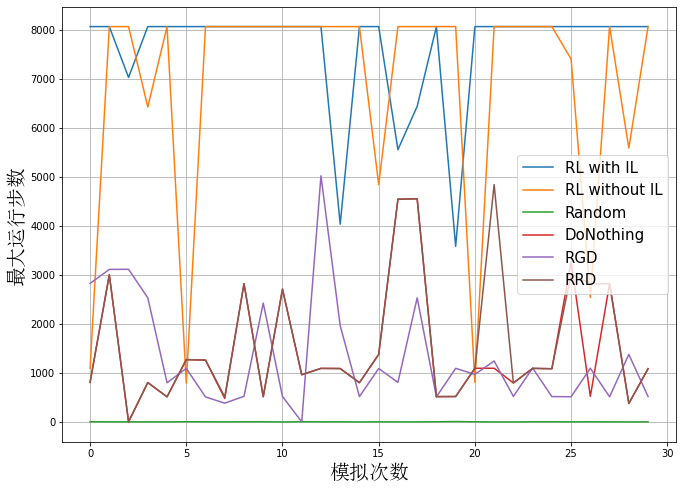

In [42]:
plt.figure(figsize=(11,8))
plt.plot(ss,label = 'RL with IL')
plt.plot(stil, label = "RL without IL")
plt.plot(RDsteps, label = 'Random')
plt.plot(DNsteps, label ='DoNothing')
plt.plot(GDsteps, label ='RGD')
plt.plot(DRDsteps,label = 'RRD')
plt.legend(loc='center right',fontsize=15)
plt.grid()
plt.xlabel(u"模拟次数",fontproperties=font)
plt.ylabel(u"最大运行步数",fontproperties=font)

In [60]:
np.std(DRDtt_reward,ddof=1)

1525.7337804193887

Text(0, 0.5, '总奖励')

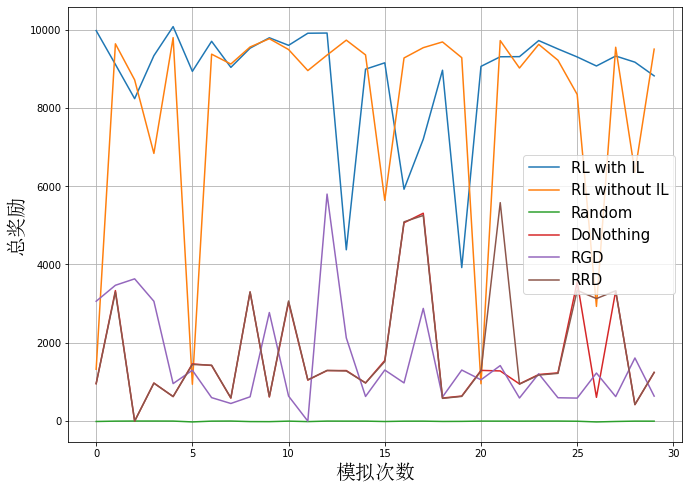

In [43]:
plt.figure(figsize=(11,8))
plt.plot(tr,label = 'RL with IL')
plt.plot(tril, label = "RL without IL")
plt.plot(RDtt_reward, label = 'Random')
plt.plot(DNtt_reward, label ='DoNothing')
plt.plot(GDtt_reward, label ='RGD')
plt.plot(DRDtt_reward,label = 'RRD')

plt.legend(loc='center right',fontsize=15)
plt.grid()
plt.xlabel(u"模拟次数",fontproperties=font)
plt.ylabel(u"总奖励",fontproperties=font)

Text(0, 0.5, '单步平均奖励')

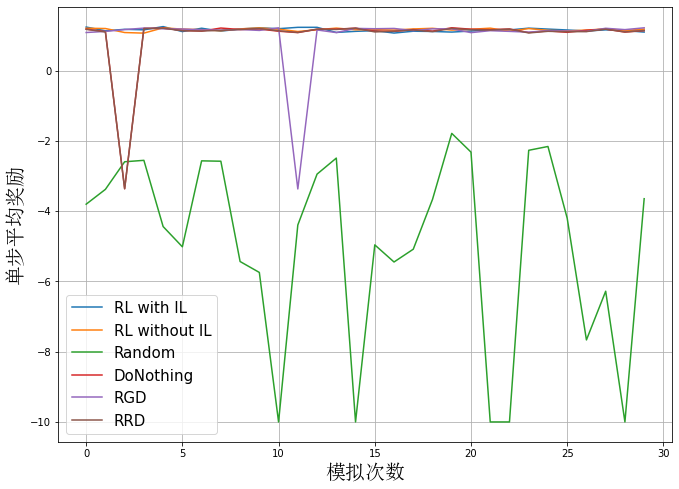

In [44]:
plt.figure(figsize=(11,8))
plt.plot(ar,label = 'RL with IL')
plt.plot(aril, label = "RL without IL")
plt.plot(RDav_reward, label = 'Random')
plt.plot(DNav_reward, label ='DoNothing')
plt.plot(GDav_reward, label ='RGD')
plt.plot(DRDav_reward, label ='RRD')
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.xlabel(u"模拟次数",fontproperties=font)
plt.ylabel(u"单步平均奖励",fontproperties=font)

In [34]:
print(sum(ss)/30)
print(sum(stil)/30)
print(sum(RDsteps)/30)
print(sum(DNsteps)/30)
print(sum(GDsteps)/30)
print(sum(DRDsteps)/30)

7607.8
6896.5
3.3666666666666667
1429.6666666666667
1325.3666666666666
1624.0


In [35]:
print(sum(tr)/30)
print(sum(tril)/30)
print(sum(RDtt_reward)/30)
print(sum(DNtt_reward)/30)
print(sum(GDtt_reward)/30)
print(sum(DRDtt_reward)/30)

8814.258806393544
8023.856100714207
-13.750746933619181
1632.4603567560514
1518.6771717131137
1849.0519528746604


In [36]:
print(sum(ar)/30)
print(sum(aril)/30)
print(sum(RDav_reward)/30)
print(sum(DNav_reward)/30)
print(sum(GDav_reward)/30)
print(sum(DRDav_reward)/30)

1.1549963793082882
1.1640995919147623
-4.91516678792459
1.0006422637103556
1.003636435270249
0.9941692578141804
